In [1]:
# Translate "PlotAnalyticalModel_v2.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

In [21]:
Vmax = 7;           # Maximum gliding speed (um/s)
k = 300.0;          # Spring constant (pN/um)
fstall = 0.4;       # Stall force (pN)
frupt = 9.2;        # Rupture force (pN)

Tau1 = 0.025;               # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.
Tau2min = frupt/k/Vmax;

ActiveMotorRatioTemp = np.arange(0.01,1,0.01); # 0.99

Tau = Tau1/Tau2min;
f = frupt/fstall;
Gamma = 1.0/ActiveMotorRatioTemp - 1.0;

GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

In [46]:
 ActiveMotorRatioCritical

0.853721187678411

In [58]:
ActiveMotorRatio = []; Vplus = []; Vminus = []

for I in range(len(Gamma)):
    if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical:
        ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
        Vplus.append( 0.5*Vmax/Tau*(Tau - 1.0 + np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) );
        Vminus.append( 0.5*Vmax/Tau*(Tau - 1.0 - np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) );

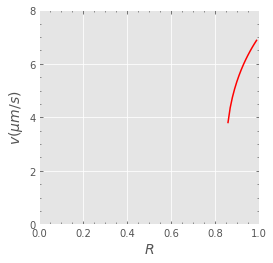

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(ActiveMotorRatio,Vplus,'r-') #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')
ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$R$', fontsize=14)
ax.set_ylabel('$v(\mu m/s)$', fontsize=14)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()

#plt.savefig('fig/gldn_spd.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spd.png', format='png', dpi=700, bbox_inches='tight')
plt.show()

In [75]:
for f in [2,3]:
    for i in [1,2,3]:
        print(f)

2
2
2
3
3
3


In [95]:
a = [[]]*3

In [99]:
a[2]

[]

In [107]:
frupt = np.array([2.0,4.0,8.0,9.2]);f = frupt/fstall
Tau2min = frupt/k/Vmax; Tau = Tau1/Tau2min
GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

In [108]:
ActiveMotorRatioCritical

array([0.26117779, 0.5681626 , 0.82110434, 0.85372119])

In [109]:
f

array([ 5., 10., 20., 23.])

In [115]:
frupt = np.array([2.0,4.0,8.0,9.2]);f = frupt/fstall
Tau2min = frupt/k/Vmax; Tau = Tau1/Tau2min
GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

ActiveMotorRatio = [[]]*len(f); Vplus = [[]]*len(f); Vminus = [[]]*len(f)

c = 0
for i in range(len(f)):
    for I in range(len(Gamma)):
        if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical[i]:
            ActiveMotorRatio[c].append( ActiveMotorRatioTemp[I] )
            Vplus[c].append( 0.5*Vmax/Tau[i]*(Tau[i] - 1.0 + np.sqrt((1.0 - Tau[i])**2 + 4.0*Tau[i] - 2.0*f[i]*Tau[i]*Gamma[I])) );
            Vminus[c].append( 0.5*Vmax/Tau[i]*(Tau[i] - 1.0 - np.sqrt((1.0 - Tau[i])**2 + 4.0*Tau[i] - 2.0*f[i]*Tau[i]*Gamma[I])) );
    c+=1

In [122]:
len(ActiveMotorRatio[2])

147

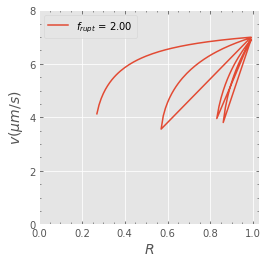

In [123]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

#for i in range(len(ActiveMotorRatio)):
ax.plot(ActiveMotorRatio[0],Vplus[0], label='$f_{rupt}$ = %.2f'%frupt[0])
ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$R$', fontsize=14)
ax.set_ylabel('$v(\mu m/s)$', fontsize=14)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()
ax.legend()

#plt.savefig('fig/gldn_spds.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spds.png', format='png', dpi=700, bbox_inches='tight')
plt.show()

In [44]:
ActiveMotorRatio

[0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.9500000000000001,
 0.9600000000000001,
 0.97,
 0.98,
 0.99]

In [45]:
Vplus

[3.8056184344005257,
 4.357809783078366,
 4.745175898727825,
 5.058041096919209,
 5.325448997925292,
 5.561242757369131,
 5.773333333333335,
 5.966758598451128,
 6.144968737946562,
 6.310453769956673,
 6.465083448801845,
 6.610306081614683,
 6.747271932149401,
 6.876913530417082]

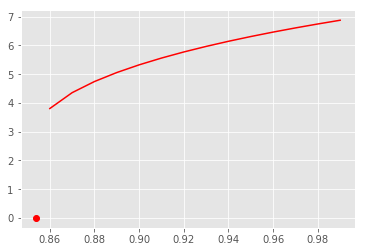

In [30]:
plt.plot(ActiveMotorRatio,Vplus,'r-',ActiveMotorRatioCritical,0.0,'ro')

In [ ]:
plot(ActiveMotorRatio,Vplus,'r-',ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')
xlabel('Active motor ratio');ylabel('v (um/s)');
axis([0.0 1.0 0.0 8.0])
saveas(gcf,'r-vAll.fig');
saveas(gcf,'r-vAll.png');

figure
plot(ActiveMotorRatio,Vplus,'r-',ActiveMotorRatioCritical,0.0,'ro')
xlabel('Active motor ratio');ylabel('v (um/s)');
axis([0.0 1.0 0.0 8.0])
saveas(gcf,'r-v.fig');
saveas(gcf,'r-v.png');

OutputData = [ActiveMotorRatio;Vplus];
OutputData = OutputData.';
save('r-v.txt','OutputData','-ascii') 